In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy import dot
from numpy import random
from numpy import sqrt
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('/content/Dataset.csv')
print(dataset)

       0.143  0.98493
0   -0.30467  0.98562
1    0.46625 -0.84003
2    0.94847  0.37222
3   -0.96871 -0.26697
4    0.31051  0.98325
..       ...      ...
994  4.48210 -7.40030
995 -3.49630  8.63860
996  6.10620 -5.98640
997 -7.40940 -5.52050
998 -0.12948 -8.80360

[999 rows x 2 columns]


In [3]:
dataset.keys()

Index(['0.143', '0.98493'], dtype='object')

In [4]:
dataset.describe()

,0.143,0.98493
count,999.000000,999.000000
mean,-0.000143,-0.000986
std,3.846521,4.109522
min,-9.494100,-8.836600
25%,-2.026700,-2.393700
50%,0.068287,0.101410
75%,2.477800,2.415250
max,8.566400,9.172600


In [5]:
dataset.corr()

,0.143,0.98493
0.143,1.000000,0.051263
0.98493,0.051263,1.000000


In [6]:
n_samples, n_features = dataset.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 999
Number of features: 2


In [7]:
X = dataset.iloc[:,1:2].values
Y = dataset.iloc[:,0].values
X.shape
Y.shape


(999,)

In [8]:
print("Variance in x =",np.var(dataset))

Variance in x = 0.143      14.780916
0.98493    16.871264
dtype: float64


In [9]:
print("Variance in x =",np.var(X))
print("Variance in y =",np.var(Y))

Variance in x = 16.87126359660709
Variance in y = 14.780916207895674


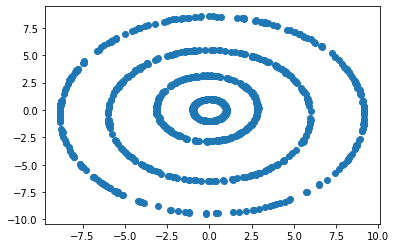

In [10]:
plt.scatter(X, Y)

In [11]:
# calculate the mean of each column
Mean_vector = mean(dataset.T, axis=1)
print(Mean_vector)

0.143     -0.000143
0.98493   -0.000986
dtype: float64


In [12]:
# centering the values

# center columns by subtracting column means
Centered_dataset = dataset - Mean_vector

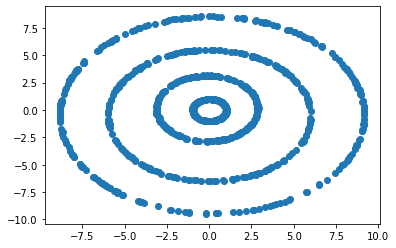

In [13]:
Centered_X = Centered_dataset.iloc[:,1:2].values
Centered_Y = Centered_dataset.iloc[:,0].values
plt.scatter(Centered_X, Centered_Y)

In [14]:
#covariance matrix
number_of_points = 1000
CovMatrix2 = dot(Centered_dataset.T, Centered_dataset) /(number_of_points-1) #in numpy N-1 is the default 
print(CovMatrix2)

[[14.78091621  0.80952758]
 [ 0.80952758 16.8712636 ]]


In [15]:
# now we can calculate the covariance matrix
CovMatrix = cov(Centered_dataset.T)
print(CovMatrix)

[[14.79572675  0.81033873]
 [ 0.81033873 16.88816867]]


In [16]:
# make eigendecomposition of covariance matrix
values, vectors = eig(CovMatrix)


In [17]:
print('Eigenvalues \n', values)
print('Eigenvectors \n', vectors)

Eigenvalues 
 [14.51860831 17.16528711]
Eigenvectors 
 [[-0.94620071 -0.32358031]
 [ 0.32358031 -0.94620071]]


(-11.815488164251573,
 10.173065400480828,
 -12.776973645800322,
 9.58290065814169)

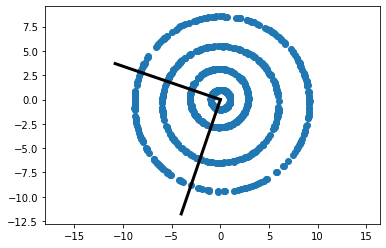

In [18]:
import matplotlib.pyplot as pyplot
plt.scatter(Centered_X, Centered_Y)

for e, v in zip(values, vectors.T):
    pyplot.plot([0, 3*sqrt(e)*v[0]], [0, 3*sqrt(e)*v[1]], 'k-', lw=3) 
pyplot.axis('equal')

In [19]:
#Sorting eigenvalues in descending order.

# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(values[i]), vectors[i,:]) for i in range(len(values))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(17.16528710571078, array([ 0.32358031, -0.94620071])), (14.51860830981853, array([-0.94620071, -0.32358031]))]


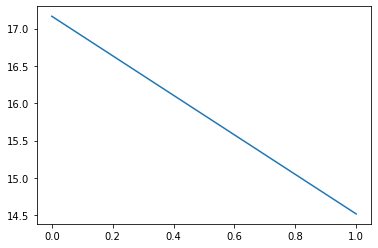

In [20]:
plt.plot(eig_vals_sorted)

In [21]:
# Select top k eigenvectors
k = 2
W = eig_vecs_sorted[:k, :] # Projection matrix

print(W.shape)
print(W)

(2, 2)
[[ 0.32358031 -0.94620071]
 [-0.94620071 -0.32358031]]


The explained variance tells us how much variance can be attributed to each of the principal components.

Explained variance: [54.18 45.82]
Cumulative explained variance: [ 54.18 100.  ]


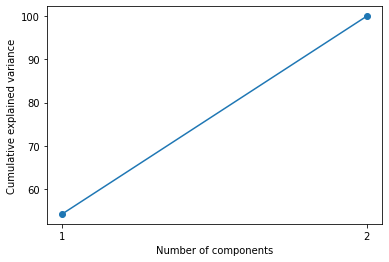

In [22]:
eig_vals_total = sum(values)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

In [23]:
X_proj = Centered_dataset.dot(W.T)

print(X_proj.shape)

(999, 2)


summary of above in a single cell



In [24]:
class MyPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components   
        
    def fit(self, X):
        # Standardize data 
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean) / self.scale
        
        # Eigendecomposition of covariance matrix       
        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
        
        # Adjusting the eigenvectors that are largest in absolute value to be positive    
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T
       
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = eig_vecs_sorted[:self.n_components,:]
        
        # Explained variance ratio
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]
        
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)
        
        return X_proj
# ---------------------------------------------------------
my_pca = MyPCA(n_components = 2).fit(dataset)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

X_proj = my_pca.transform(dataset)
print('Transformed data shape from scratch:', X_proj.shape)
print(eig_pairs)

Components:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Explained variance ratio from scratch:
 [0.5256316858523, 0.4743683141477]
Cumulative explained variance from scratch:
 [0.52563169 1.        ]
Transformed data shape from scratch: (999, 2)
[(17.16528710571078, array([ 0.32358031, -0.94620071])), (14.51860830981853, array([-0.94620071, -0.32358031]))]


Another Approach for same



In [25]:
data = np.genfromtxt('/content/Dataset.csv', delimiter=',') # Loading Data
data

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [26]:
import matplotlib.pyplot as plt

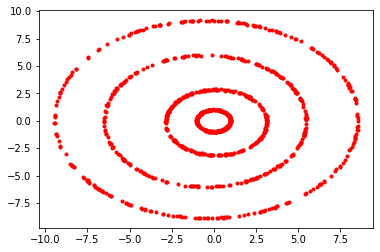

In [27]:
x,y = data[:,0],data[:,1]
plt.plot(x,y,'r.')

In [28]:
mean_of_data = np.mean(data,axis = 0) # Mean of data
mean_of_data

array([4.075e-07, 2.227e-07])

In [29]:
centered_data = data - mean_of_data #centering data
centered_data

array([[ 0.14299959,  0.98492978],
       [-0.30467041,  0.98561978],
       [ 0.46624959, -0.84003022],
       ...,
       [ 6.10619959, -5.98640022],
       [-7.40940041, -5.52050022],
       [-0.12948041, -8.80360022]])

In [30]:
var_ori = np.var(centered_data,axis=0)  #Variance of original data

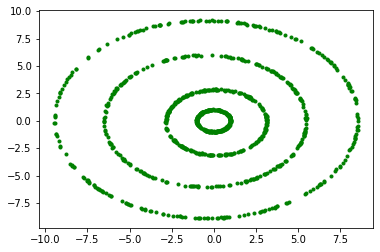

In [31]:
x_c,y_c = centered_data[:,0],centered_data[:,1]
plt.plot(x_c,y_c,'g.')

In [32]:
covariance = np.cov(centered_data,rowvar = False)  # covariance matrix of centered data
covariance

array([[14.7809367 ,  0.80966871],
       [ 0.80966871, 16.87223563]])

In [33]:
import scipy.linalg as la

In [34]:
eigen_values,eigen_vectors = la.eig(covariance)


In [35]:
print('The eigen values are :',eigen_values)
print()
print('The eigen vectors of covariance matrix :',eigen_vectors)

The eigen values are : [14.50410886+0.j 17.14906347+0.j]

The eigen vectors of covariance matrix : [[-0.9462227 -0.323516 ]
 [ 0.323516  -0.9462227]]


In [36]:
eig_ind = []
for i in range(len(eigen_values)):
    eig_ind.append((i,eigen_values[i]))
eig_ind.sort(key = lambda x: x[1],reverse = True)
eigen_values = (eig_ind[0][1],eig_ind[1][1])
major_eve,minor_eve = eigen_vectors[:,eig_ind[0][0]],eigen_vectors[:,eig_ind[1][0]] # 1st and 2nd principle components

In [37]:
w_transpose = np.array([major_eve,minor_eve])
projection_scalars = w_transpose@np.transpose(centered_data)
projection_scalars  # Projections

array([[-0.97822557, -0.83405005,  0.64401646, ...,  3.68901448,
         7.62068223,  8.37205534],
       [ 0.18333109,  0.60714983, -0.71293917, ..., -7.71452094,
         5.22497267, -2.72558827]])

In [38]:
major_eve_new_data,minor_eve_new_data = [],[]
for i in range(len(centered_data)):
    major_eve_new_data.append(list(projection_scalars[0][i]*major_eve))
    minor_eve_new_data.append(list(projection_scalars[1][i]*minor_eve))
major_eve_new_data = np.array(major_eve_new_data) # Projected data on 1st principle component
minor_eve_new_data = np.array(minor_eve_new_data) # Projected data on 2nd principle component

In [39]:
major_var = np.var(major_eve_new_data) # variance of 1st principle component
minor_var = np.var(minor_eve_new_data) # variance of 2nd principle component

In [40]:
ori_var_mag = np.linalg.norm(var_ori)      # magnitude of original data variance
major_var_mag = np.linalg.norm(major_var)  # magnitude of 1st principle variance
minor_var_mag = np.linalg.norm(minor_var)  # magnitude of 2nd principle variance

Printing the explained variance 

In [41]:
percent_var_major = (abs(major_var_mag - ori_var_mag)/ori_var_mag)*100
percent_var_minor = (abs(minor_var_mag - ori_var_mag)/ori_var_mag)*100
print('Variance explained by 1st PCA :{}%'.format(percent_var_major))
print('variance explained by 2nd PCA :{}%'.format(percent_var_minor))

Variance explained by 1st PCA :61.77369212497512%
variance explained by 2nd PCA :67.66945718242042%


Text(0.5, 1.0, 'Projection scalars of two principle components')

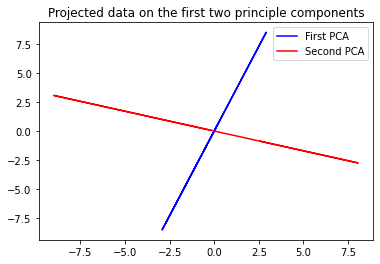

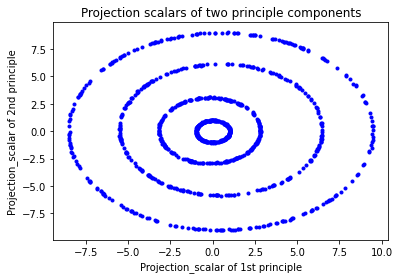

In [42]:
plt.figure(1)
pca_major = np.array(major_eve_new_data)
ma_x,ma_y = pca_major[:,0],pca_major[:,1]
plt.plot(ma_x,ma_y,'b')
plt.title('Projected data on the first two principle components')

pca_minor = np.array(minor_eve_new_data)
mi_x,mi_y = pca_minor[:,0],pca_minor[:,1]
plt.plot(mi_x,mi_y,'r')

plt.legend(['First PCA','Second PCA'])

plt.figure(2)
plt.plot(projection_scalars[1],projection_scalars[0],'b.')
plt.xlabel('Projection_scalar of 1st principle')
plt.ylabel('Projection_scalar of 2nd principle')
plt.title('Projection scalars of two principle components')